# IMPORTING ALL THE LIBRARIES

In [1]:
import cv2
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
from PIL import Image
import import_ipynb
import numpy as np
import os
import glob

# SETTING UP THE PYTESSERACT PATH

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# SETTING UP THE DYSLEXIC AND NON DYSLEXIC IMAGE DIRECTORY

In [3]:
# Directory containing the dyslexic images
image_directory_dyslexic = './data/dyslexic'

# Directory containing the dyslexic images
image_directory_non_dyslexic = './data/non_dyslexic' 

# List all image files in the directory
image_files_dy = glob.glob(os.path.join(image_directory_dyslexic, '*.jpg')) + glob.glob(os.path.join(image_directory_dyslexic, '*.png'))
image_files_non_dy = glob.glob(os.path.join(image_directory_non_dyslexic, '*.jpg')) + glob.glob(os.path.join(image_directory_non_dyslexic, '*.png'))

# PRINTING THE FETCHED IMAGES DIR

In [4]:
print(image_files_dy)

['./data/dyslexic\\1.jpg', './data/dyslexic\\10.jpg', './data/dyslexic\\11.jpg', './data/dyslexic\\12.jpg', './data/dyslexic\\13.jpg', './data/dyslexic\\14.jpg', './data/dyslexic\\15.jpg', './data/dyslexic\\16.jpg', './data/dyslexic\\17.jpg', './data/dyslexic\\18.jpg', './data/dyslexic\\19.jpg', './data/dyslexic\\2.jpg', './data/dyslexic\\20.jpg', './data/dyslexic\\21.jpg', './data/dyslexic\\22.jpg', './data/dyslexic\\23.jpg', './data/dyslexic\\24.jpg', './data/dyslexic\\25.jpg', './data/dyslexic\\26.jpg', './data/dyslexic\\27.jpg', './data/dyslexic\\28.jpg', './data/dyslexic\\29.jpg', './data/dyslexic\\3.jpg', './data/dyslexic\\30.jpg', './data/dyslexic\\31.jpg', './data/dyslexic\\32.jpg', './data/dyslexic\\33.jpg', './data/dyslexic\\34.jpg', './data/dyslexic\\35.jpg', './data/dyslexic\\36.jpg', './data/dyslexic\\37.jpg', './data/dyslexic\\38.jpg', './data/dyslexic\\39.jpg', './data/dyslexic\\4.jpg', './data/dyslexic\\40.jpg', './data/dyslexic\\41.jpg', './data/dyslexic\\42.jpg', './d

In [5]:
print(image_files_non_dy)

['./data/non_dyslexic\\1.jpg', './data/non_dyslexic\\10.jpg', './data/non_dyslexic\\11.jpg', './data/non_dyslexic\\12.jpg', './data/non_dyslexic\\13.jpg', './data/non_dyslexic\\14.jpg', './data/non_dyslexic\\15.jpg', './data/non_dyslexic\\16.jpg', './data/non_dyslexic\\17.jpg', './data/non_dyslexic\\18.jpg', './data/non_dyslexic\\19.jpg', './data/non_dyslexic\\2.jpg', './data/non_dyslexic\\20.jpg', './data/non_dyslexic\\21.jpg', './data/non_dyslexic\\22.jpg', './data/non_dyslexic\\23.jpg', './data/non_dyslexic\\24.jpg', './data/non_dyslexic\\25.jpg', './data/non_dyslexic\\26.jpg', './data/non_dyslexic\\27.jpg', './data/non_dyslexic\\28.jpg', './data/non_dyslexic\\29.jpg', './data/non_dyslexic\\3.jpg', './data/non_dyslexic\\30.jpg', './data/non_dyslexic\\31.jpg', './data/non_dyslexic\\32.jpg', './data/non_dyslexic\\33.jpg', './data/non_dyslexic\\34.jpg', './data/non_dyslexic\\35.jpg', './data/non_dyslexic\\36.jpg', './data/non_dyslexic\\37.jpg', './data/non_dyslexic\\38.jpg', './data/no

# Sample Extraction

# Visualizing the image

In [6]:
image_path = './data/non_dyslexic/10.jpg'
img = Image.open(image_path)

Random image path: ./data/non_dyslexic/10.jpg
Image height: 280
Image width: 493


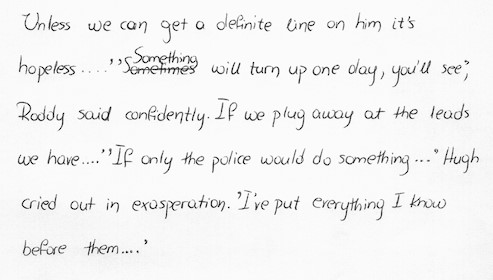

In [7]:
# print metadata
print(f"Random image path: {image_path}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [8]:
def preprocess_image(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # cv2.imshow('Grayscale Image', gray_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    # cv2.imshow('Blurred Image', blurred_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    # Apply adaptive thresholding to enhance text
    threshold_image = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    # cv2.imshow('Threshold Image', threshold_image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    
    return gray_image

In [9]:
image_path = './data/non_dyslexic/10.jpg'

# Load the image
image = cv2.imread(image_path)

# Preprocess the image
preprocessed_image = preprocess_image(image)
# Use pytesseract to perform OCR on the preprocessed image
extracted_text = pytesseract.image_to_string(image_path)
print(extracted_text)

Unless we can get e definite tne on him its
hopelss....°SSRERMB wit turn up one day, yall se}
Reddy said contdently. IP we plug away at He leads
we have...""IP only the police would do something ..” Hugh
Cried out in exasperation. “Tie put Crerything E kro
befare them...’



In [10]:
from textblob import TextBlob
print(str(TextBlob(extracted_text).correct()))

Unless we can get e definite the on him its
hopeless....°SSRERMB wit turn up one day, all se}
Eddy said confidently. of we plug away at He leads
we have...""of only the police would do something ..” Hugh
Cried out in exasperation. “Lie put Everything E fro
before them...’



In [11]:
# import nltk
# nltk.download('punkt')

In [12]:
# import os
# import cv2
# import csv
# import pytesseract
# from textblob import TextBlob
# import language_tool_python

# my_tool = language_tool_python.LanguageTool('en-US')

# def levenshtein(s1, s2):
#     if len(s1) < len(s2):
#         return levenshtein(s2, s1)

#     if len(s2) == 0:
#         return len(s1)

#     previous_row = range(len(s2) + 1)
#     for i, c1 in enumerate(s1):
#         current_row = [i + 1]
#         for j, c2 in enumerate(s2):
#             insertions = previous_row[j + 1] + 1
#             deletions = current_row[j] + 1
#             substitutions = previous_row[j] + (c1 != c2)
#             current_row.append(min(insertions, deletions, substitutions))
#         previous_row = current_row

#     return previous_row[-1]

# def spelling_accuracy(extracted_text):
#     spell_corrected = str(TextBlob(extracted_text).correct())
#     return ((len(extracted_text) - levenshtein(extracted_text, spell_corrected))/(len(extracted_text)+1))*100

# def grammatical_accuracy(extracted_text):
#     try:
#         spell_corrected = str(TextBlob(extracted_text).correct())
#         correct_text = my_tool.correct(spell_corrected)
#         extracted_text_set = set(spell_corrected.split(" "))
#         correct_text_set = set(correct_text.split(" "))
#         n = max(len(extracted_text_set - correct_text_set), len(correct_text_set - extracted_text_set))
#         return ((len(spell_corrected) - n) / (len(spell_corrected) + 1)) * 100
#     except Exception as e:
#         print("Error while calculating grammatical accuracy:", e)
#         return 0

# def process_images(directory, label):
#     data = []
#     for filename in os.listdir(directory):
#         if filename.endswith(".jpg") or filename.endswith(".png"):
#             image_path = os.path.join(directory, filename)
#             image = cv2.imread(image_path)
#             preprocessed_image = preprocess_image(image)
#             extracted_text = pytesseract.image_to_string(preprocessed_image)
#             spelling_acc = spelling_accuracy(extracted_text)
#             grammatical_acc = grammatical_accuracy(extracted_text)
#             percentage_correction = (100 - spelling_acc + 100 - grammatical_acc)
#             data.append([spelling_acc, grammatical_acc, percentage_correction, label])
#     return data

# # Directory containing the dyslexic images
# image_directory_dyslexic = './data/dyslexic'

# # Directory containing the dyslexic images
# image_directory_non_dyslexic = './data/non_dyslexic' 

# dyslexic_data = process_images(image_directory_dyslexic, 1)
# non_dyslexic_data = process_images(image_directory_non_dyslexic, 0)

# with open('data.csv', mode='w', newline='') as file:
#     writer = csv.writer(file)
#     writer.writerow(['Spelling Accuracy', 'Grammatical Accuracy', 'Percentage of Correction', 'Label'])
#     writer.writerows(dyslexic_data)
#     writer.writerows(non_dyslexic_data)

# print("Data has been written to data.csv file.")


In [13]:
# import pandas as pd

# # Read the data from CSV file
# data = pd.read_csv('data.csv')

# # Filter out records with 0 spelling and grammatical accuracy
# filtered_data = data[(data['Spelling Accuracy'] != 0) & (data['Grammatical Accuracy'] != 0)]

# # Write the filtered data back to the original CSV file, overwriting it
# filtered_data.to_csv('data.csv', index=False)

# print("Records with 0 spelling and grammatical accuracy have been deleted from data.csv.")


# USING DIFFERENT CLASSIFIERS

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle as pkl
import m2cgen

In [15]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [16]:
print('Train Data')
train_data.head()

Train Data


,spelling_accuracy,gramatical_accuracy,percentage_of_corrections,percentage_of_phonetic_accuraccy,presence_of_dyslexia
0,99.16,99.72,13.04,92.02,1
1,92.68,99.37,16.21,95.26,1
2,50.00,50.00,0.00,61.45,1
3,90.60,99.31,13.55,93.84,1
4,92.75,97.05,13.33,94.56,1


In [17]:
print('Test Data')
test_data.head()

Test Data


,spelling_accuracy,gramatical_accuracy,percentage_of_corrections,percentage_of_phonetic_accuraccy,presence_of_dyslexia
0,99.159664,99.720670,8.108108,99.258944,0
1,98.259188,99.806576,5.263158,98.912972,0
2,98.989899,99.326599,8.064516,99.644876,0
3,97.891566,99.395770,3.076923,98.428741,0
4,98.087432,99.724518,7.692308,98.918311,0


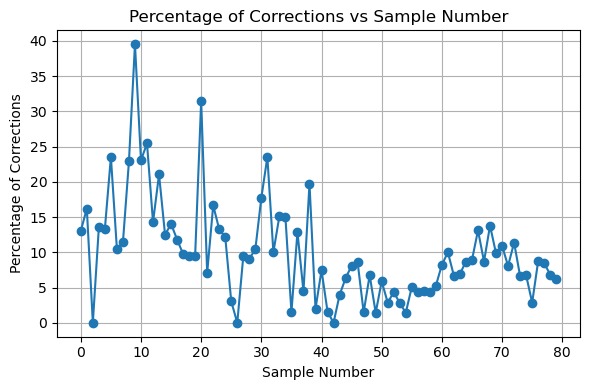

In [18]:
df = pd.read_csv('./data/data.csv')
plt.figure(figsize=(6, 4)) 
plt.plot(df.index, df[' percentage_of_corrections'], marker='o', linestyle='-')
plt.xlabel('Sample Number')
plt.ylabel('Percentage of Corrections')
plt.title('Percentage of Corrections vs Sample Number')
plt.grid(True)
plt.tight_layout()
plt.show()

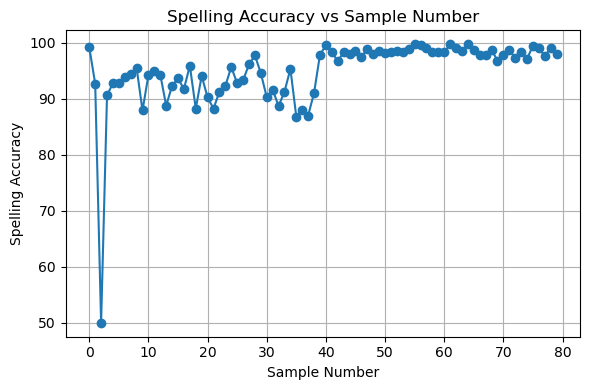

In [19]:
df = pd.read_csv('./data/data.csv')
plt.figure(figsize=(6, 4)) 
plt.plot(df.index, df['spelling_accuracy'], marker='o', linestyle='-')
plt.xlabel('Sample Number')
plt.ylabel('Spelling Accuracy')
plt.title('Spelling Accuracy vs Sample Number')
plt.grid(True)
plt.tight_layout()
plt.show()

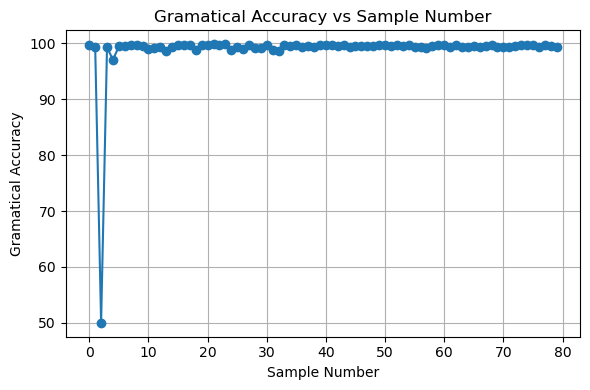

In [20]:
df = pd.read_csv('./data/data.csv')
plt.figure(figsize=(6, 4)) 
plt.plot(df.index, df['gramatical_accuracy'], marker='o', linestyle='-')
plt.xlabel('Sample Number')
plt.ylabel('Gramatical Accuracy')
plt.title('Gramatical Accuracy vs Sample Number')
plt.grid(True)
plt.tight_layout()
plt.show()

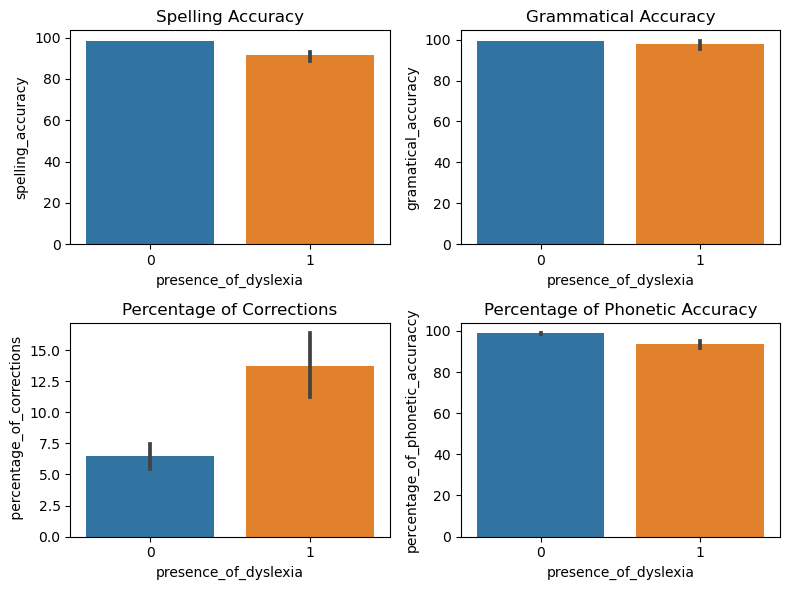

In [21]:
df = pd.read_csv('train.csv')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
sns.barplot(x='presence_of_dyslexia', y='spelling_accuracy', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Spelling Accuracy')
sns.barplot(x='presence_of_dyslexia', y='gramatical_accuracy', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Grammatical Accuracy')
sns.barplot(x='presence_of_dyslexia', y=' percentage_of_corrections', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Percentage of Corrections')
sns.barplot(x='presence_of_dyslexia', y='percentage_of_phonetic_accuraccy', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Percentage of Phonetic Accuracy')

plt.tight_layout()

plt.show()

In [22]:
x_train = train_data.drop(["presence_of_dyslexia"], axis= "columns")
x_test = test_data.drop(["presence_of_dyslexia"], axis= "columns")
y_train = train_data.presence_of_dyslexia
y_test = test_data.presence_of_dyslexia

# Training a Random Forest Model

In [23]:
model_rf = RandomForestClassifier(n_estimators=100, random_state=60)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=60)

In [24]:
print("Random Forest Model Evaluation:")
print("Test Accuracy:", model_rf.score(x_test, y_test))
print("Train Accuracy:", model_rf.score(x_train, y_train))

Random Forest Model Evaluation:
Test Accuracy: 0.9
Train Accuracy: 1.0


In [25]:
confusion_matrix(model_rf.predict(x_train), y_train)

array([[40,  0],
       [ 0, 40]], dtype=int64)

In [26]:
confusion_matrix(model_rf.predict(x_test), y_test)

array([[10,  2],
       [ 0,  8]], dtype=int64)

<Axes: >

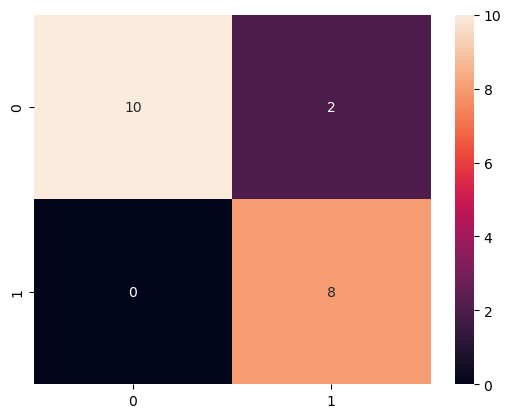

In [27]:
sns.heatmap(confusion_matrix(model_rf.predict(x_test), y_test), annot=True)

<Axes: >

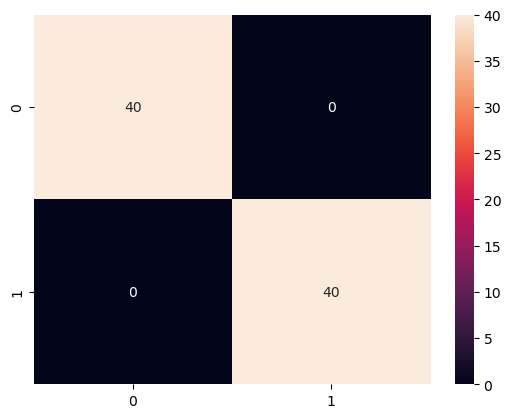

In [28]:
sns.heatmap(confusion_matrix(model_rf.predict(x_train), y_train), annot=True)

# Training a Decision Tree classifier

In [29]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
print(model_DT.score(x_test, y_test))
print(model_DT.score(x_train, y_train))

0.95
1.0


In [31]:
confusion_matrix(model_DT.predict(x_test), y_test)

array([[10,  1],
       [ 0,  9]], dtype=int64)

In [32]:
confusion_matrix(model_DT.predict(x_train), y_train)

array([[40,  0],
       [ 0, 40]], dtype=int64)

<Axes: >

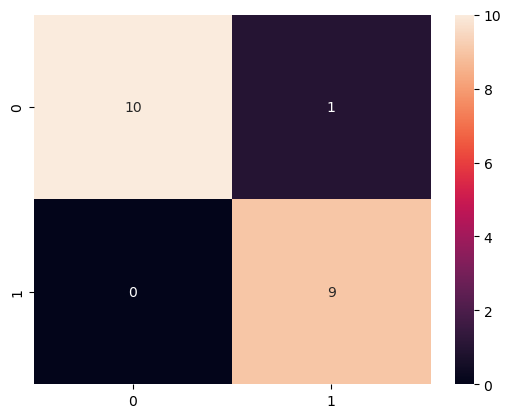

In [33]:
sns.heatmap(confusion_matrix(model_DT.predict(x_test), y_test), annot=True)

<Axes: >

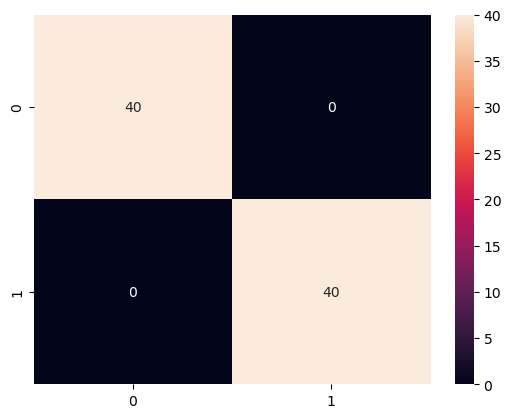

In [34]:
sns.heatmap(confusion_matrix(model_DT.predict(x_train), y_train), annot=True)